**Project Name : Car Price Prediction(EDA)**









College Name:Chanakya Universiy

Under the guidance of Dr.Bhanu K.N


Author:Pradeep Burli(24PG00078)



**Project Summary**

In this project, we predicted the prices of used cars using machine learning. The data included details like brand, year, mileage, fuel type, and transmission. After cleaning the data and analyzing it, we built a Random Forest model that gave 97% accuracy. We found that features like max power and age of the car were the most important for price prediction. This model can help people and dealers make better decisions when buying or selling used cars.

**Workflow Overview**

Data Collection
Gathered used car data with key features (brand, year, mileage, etc.)

Data Cleaning
Removed missing values, duplicates, and outliers; corrected data types

Exploratory Data Analysis (EDA)
Visualized trends, correlations, and patterns in the data

Feature Selection
Identified the most relevant features for accurate prediction

Model Building
Trained a Random Forest Regressor using selected features

Model Evaluation
Achieved 97% accuracy using R² score and validated results

Insights & Conclusion
Extracted business insights and suggested practical uses of the model



# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the data
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv')

In [ ]:
# Show Sample of Data
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2273,Toyota Etios Liva G,2011,210000,84050,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
1014,Mahindra XUV500 W8 2WD,2013,900000,85036,Diesel,Dealer,Manual,Second Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
6549,Volkswagen Vento Diesel Highline,2011,295000,65000,Diesel,Individual,Manual,Second Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0
2061,Hyundai i20 Sportz 1.4 CRDi,2014,450000,56000,Diesel,Individual,Manual,First Owner,21.9 kmpl,1396 CC,88.76 bhp,219.6Nm@ 1750-2750rpm,5.0


In [ ]:
# Show Shape of Data
df.shape

(8128, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# Dealing with Null Values

In [ ]:
# Check NaN Value
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
# Describe Numiric Data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
# Delete Nulls
df.dropna(inplace=True , ignore_index=True)  # ignore_index = Resets the index after dropping rows

In [ ]:
# Data After Deleting Nulls
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3218,Ford Figo Diesel EXI,2011,300000,80000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
7635,Honda BRV i-VTEC V CVT,2017,950000,15000,Petrol,Individual,Automatic,First Owner,15.4 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,7.0
2921,Hyundai i20 Asta,2009,210000,89322,Petrol,Individual,Manual,Second Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
5895,Fiat Linea 1.3 Multijet Emotion,2015,500000,70000,Diesel,Individual,Manual,First Owner,20.4 kmpl,1248 CC,91.7 bhp,209Nm@ 2000rpm,5.0
5250,Hyundai Verna SX Opt,2015,540000,35000,Petrol,Dealer,Manual,Second Owner,17.7 kmpl,1497 CC,113.42 bhp,144.15nm@ 4500rpm,5.0


In [ ]:
# The New of Shape Data
df.shape

(7906, 13)

# Exploratory Data Analysis (EDA) and Insights


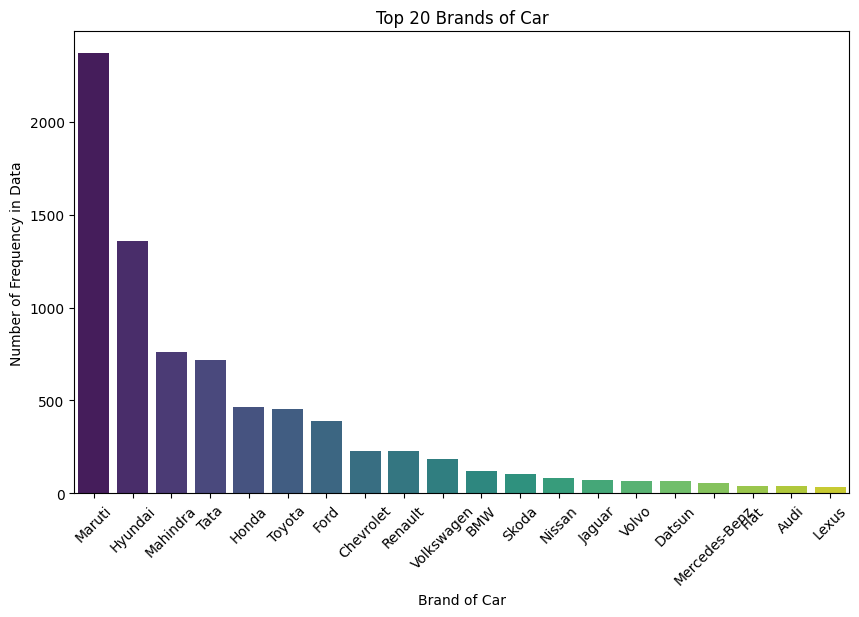

In [ ]:
# Extracting brand names
df['name'] = df['name'].str.split().str[0]

# Counting top 20 brands
brand_counts = df['name'].value_counts().nlargest(20)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Brand of Car")
plt.ylabel("Number of Frequency in Data")
plt.title("Top 20 Brands of Car")
plt.show()


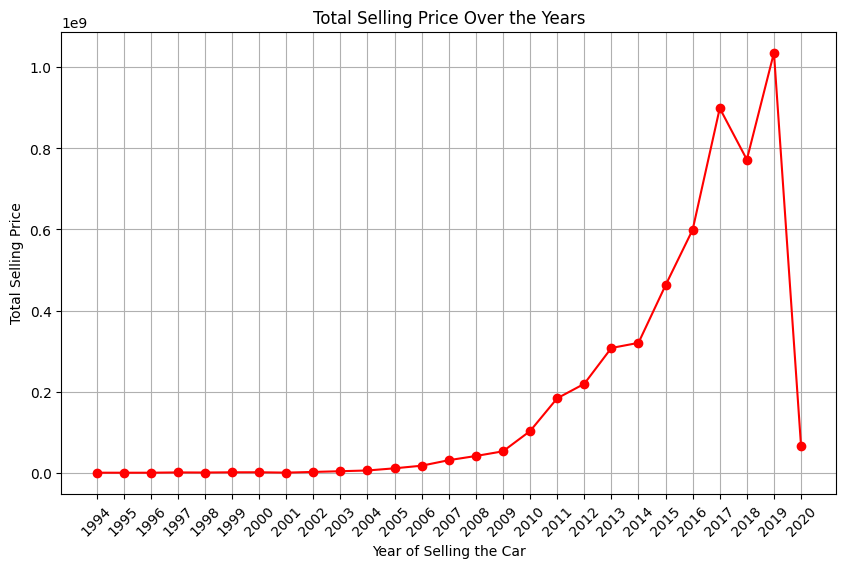

In [ ]:
# Summing selling price by year
sum_price_years = df.groupby('year')['selling_price'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sum_price_years.index, sum_price_years.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year of Selling the Car")
plt.ylabel("Total Selling Price")
plt.title("Total Selling Price Over the Years")
plt.grid(True)
plt.xticks(sum_price_years.index.astype(int) , rotation= 45)
plt.show()


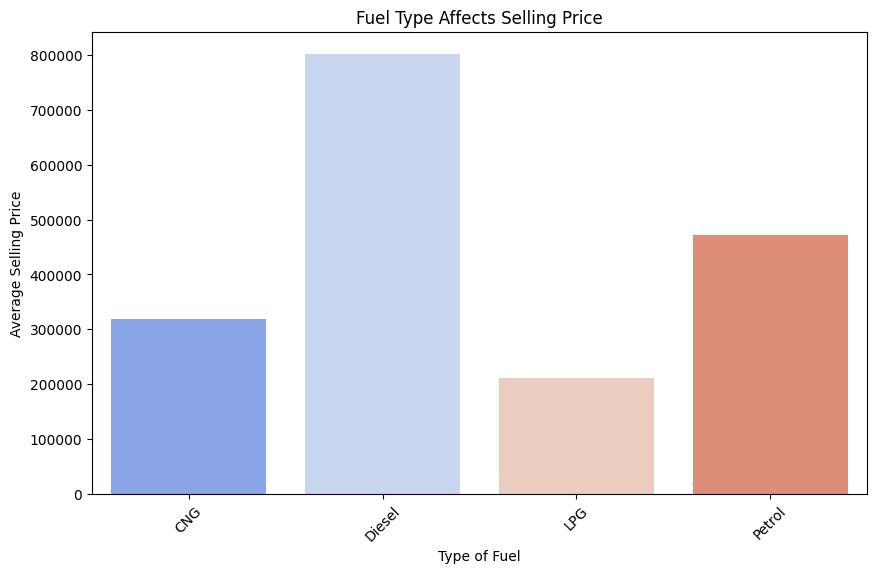

In [ ]:
# Bar chart for average selling price by fuel type
price_type_fuel = df.groupby('fuel')['selling_price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=price_type_fuel.index, y=price_type_fuel.values, palette='coolwarm')
plt.xlabel("Type of Fuel")
plt.ylabel("Average Selling Price")
plt.title("Fuel Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()

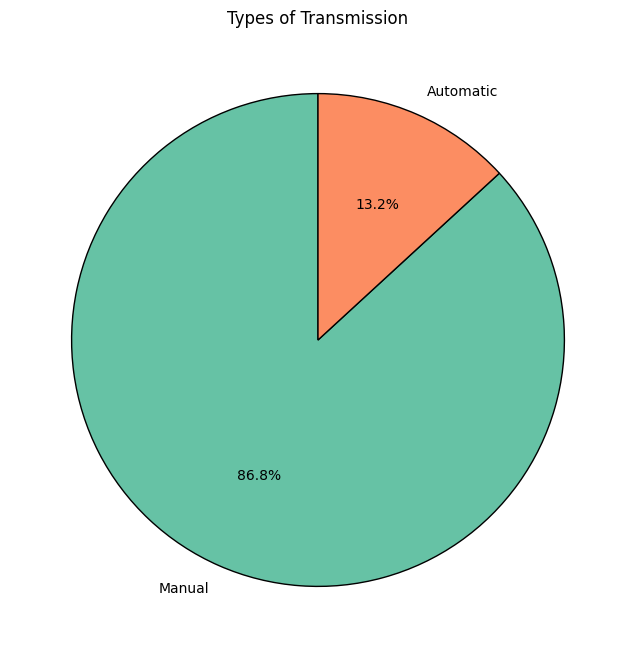

In [ ]:
# Pie chart for transmission types
type_transmission = df['transmission'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_transmission.values, labels=type_transmission.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Types of Transmission")
plt.show()

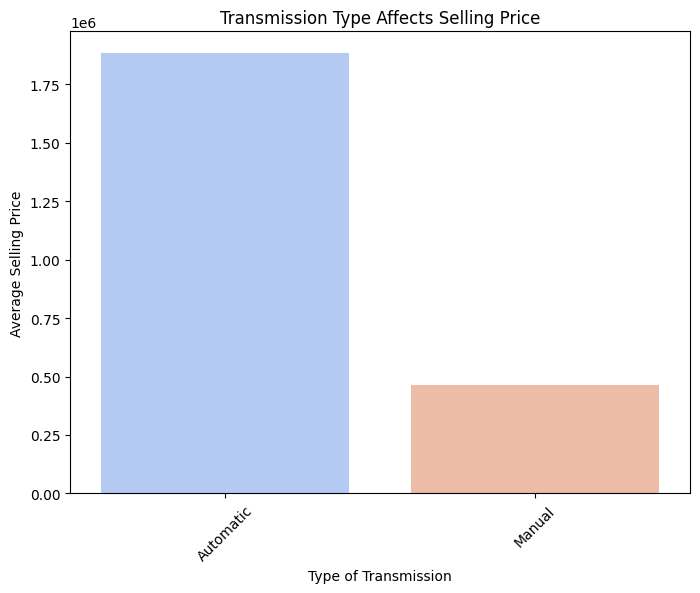

In [ ]:
# Bar chart for average selling price by transmission type
selling_price_transmission = df.groupby('transmission')['selling_price'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=selling_price_transmission.index, y=selling_price_transmission.values, palette='coolwarm')
plt.xlabel("Type of Transmission")
plt.ylabel("Average Selling Price")
plt.title("Transmission Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()


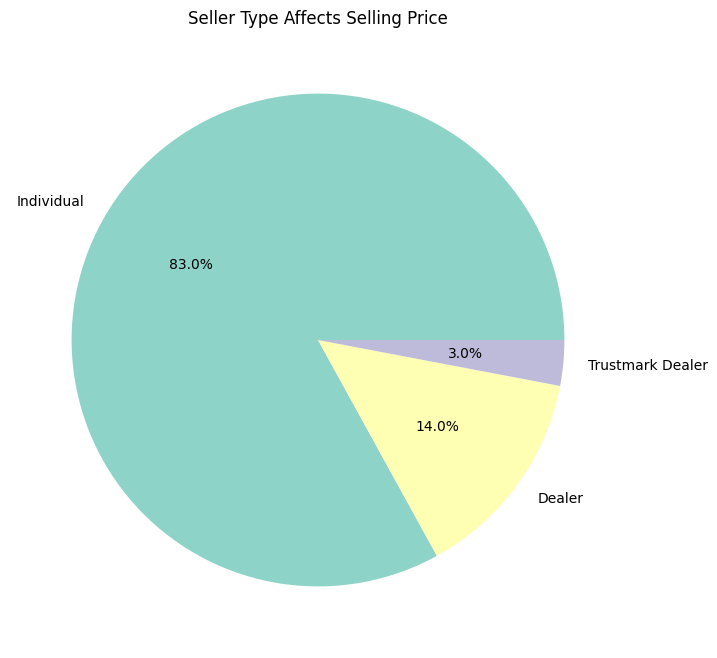

In [ ]:
# Pie chart for seller types
seller_types = df['seller_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(seller_types.values, labels=seller_types.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title("Seller Type Affects Selling Price")
plt.show()


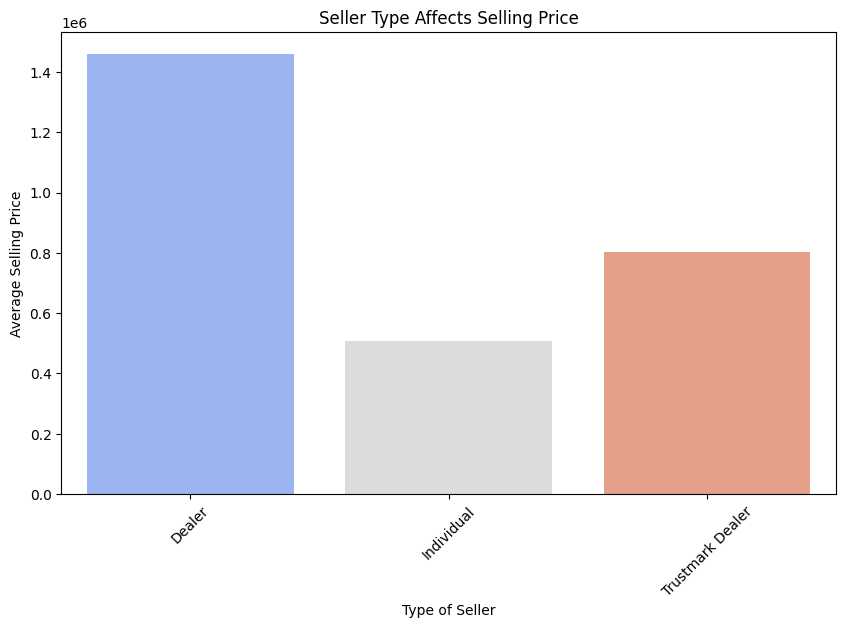

In [ ]:
# Bar chart for average selling price by seller type
selling_price_seller_types = df.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=selling_price_seller_types.index, y=selling_price_seller_types.values, palette='coolwarm')
plt.xlabel("Type of Seller")
plt.ylabel("Average Selling Price")
plt.title("Seller Type Affects Selling Price")
plt.xticks(rotation=45)
plt.show()


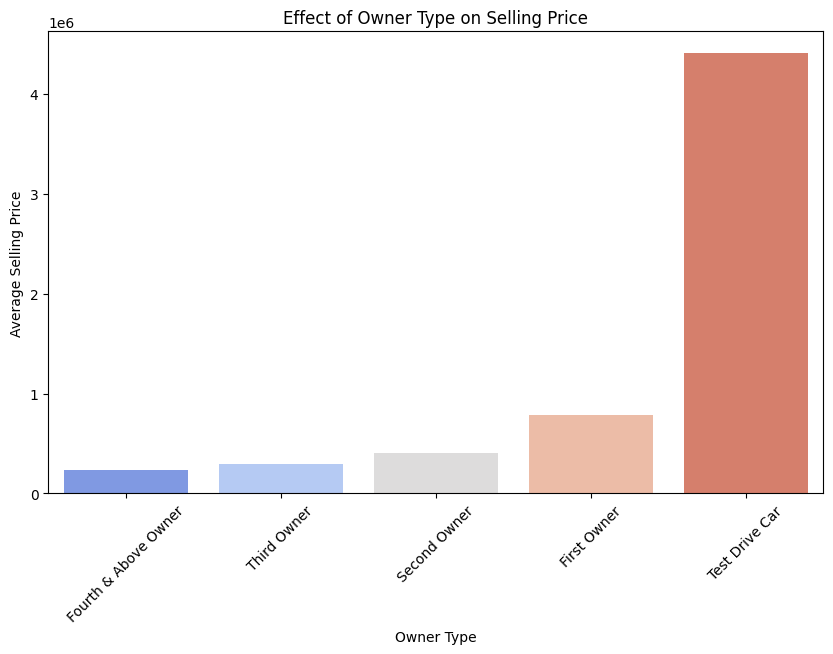

In [ ]:
#  average selling price for each owner type
owner_price = df.groupby('owner')['selling_price'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=owner_price.index, y=owner_price.values, palette='coolwarm')

# Labels & Title
plt.xlabel("Owner Type")
plt.ylabel("Average Selling Price")
plt.title("Effect of Owner Type on Selling Price")
plt.xticks(rotation=45)

plt.show()


# Data Preprocessing

In [ ]:
df[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.4 kmpl,1248 CC,74 bhp
1,21.14 kmpl,1498 CC,103.52 bhp
2,17.7 kmpl,1497 CC,78 bhp
3,23.0 kmpl,1396 CC,90 bhp
4,16.1 kmpl,1298 CC,88.2 bhp
...,...,...,...
7901,18.5 kmpl,1197 CC,82.85 bhp
7902,16.8 kmpl,1493 CC,110 bhp
7903,19.3 kmpl,1248 CC,73.9 bhp
7904,23.57 kmpl,1396 CC,70 bhp


In [ ]:
# Removing non-numeric characters and converting to float
cols_to_clean = ['mileage', 'engine', 'max_power']
df[cols_to_clean] = df[cols_to_clean].replace(r'[^0-9.]', '', regex=True).astype(float)


In [ ]:
df[['mileage','engine','max_power']]

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,17.70,1497.0,78.00
3,23.00,1396.0,90.00
4,16.10,1298.0,88.20
...,...,...,...
7901,18.50,1197.0,82.85
7902,16.80,1493.0,110.00
7903,19.30,1248.0,73.90
7904,23.57,1396.0,70.00


In [ ]:
## Deleting the column 'torque' because there are many words and specifications that can be ignored.

df.drop('torque' , axis = 1 , inplace = True)

In [ ]:
# Changed column year to Age of production Car
df.rename(columns={'year': 'age'}, inplace=True)
df['age'] = 2025 - df['age']

In [ ]:
#  Data After some of Preprocessing
df.head()

,name,age,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### Now let's encode the data and make it model ready

In [ ]:
le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])

In [ ]:
owner_order = [['Test Drive Car', 'First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner']]
oe = OrdinalEncoder(categories=owner_order)
df['owner'] = oe.fit_transform(df[['owner']])

In [ ]:
categorical_cols = ['fuel', 'seller_type', 'transmission']  # Nominal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Converting boolean columns to 0/1
df = df.astype(int)

print(df.head())


   name  age  selling_price  km_driven  owner  mileage  engine  max_power  \
0    20   11         450000     145500      1       23    1248         74   
1    26   11         370000     120000      2       21    1498        103   
2    10   19         158000     140000      3       17    1497         78   
3    11   15         225000     127000      1       23    1396         90   
4    20   18         130000     120000      1       16    1298         88   

   seats  fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0      5            1         0            0                       1   
1      5            1         0            0                       1   
2      5            0         0            1                       1   
3      5            1         0            0                       1   
4      5            0         0            1                       1   

   seller_type_Trustmark Dealer  transmission_Manual  
0                             0                  

## Now let's scale the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])  # Scale all columns

print(df.head())


       name       age  selling_price  km_driven     owner   mileage    engine  \
0  0.318278 -0.004158      -0.245613   1.343777 -0.628935  0.988894 -0.418188   
1  1.166997 -0.004158      -0.343950   0.894744  0.787288  0.496781  0.077980   
2 -1.096253  2.066530      -0.604542   1.246926  2.203511 -0.487445  0.075995   
3 -0.954799  1.031186      -0.522185   1.018008 -0.628935  0.988894 -0.124457   
4  0.318278  1.807694      -0.638960   0.894744 -0.628935 -0.733501 -0.318955   

   max_power     seats  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0  -0.483370 -0.434128     0.915987 -0.066684    -0.895854   
1   0.328261 -0.434128     0.915987 -0.066684    -0.895854   
2  -0.371421 -0.434128    -1.091718 -0.066684     1.116254   
3  -0.035574 -0.434128     0.915987 -0.066684    -0.895854   
4  -0.091548 -0.434128    -1.091718 -0.066684     1.116254   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  
0                0.452363                     -0.175412      

## Assign feature and target variables


In [ ]:
X = df.drop('selling_price' , axis = 1)
y = df['selling_price']

In [ ]:
# Splitting Data

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 44 , shuffle = True)

In [ ]:
print(f'Shape of X_Train {X_train.shape}')
print(f'Shape of X_Test {X_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (5929, 14)
Shape of X_Test (1977, 14)
Shape of Y_Train (5929,)
Shape of Y_Test (1977,)


# Modeling

In [ ]:
# for storing the results of models

df_results = pd.DataFrame(columns=["Model", "Testing Accuracy (%)"])

## OG Liner Regression

In [ ]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=10)

lr.fit(X_train, y_train)

print("Cross-Validation Score:", scores.mean() * 100)
print("Training Accuracy:", lr.score(X_train, y_train) * 100)
print("Testing Accuracy:", lr.score(X_test, y_test) * 100)
print("R² Score:", r2_score(y_test, lr.predict(X_test)) * 100)

# Storing results in DataFrame
df_results.loc[len(df_results)] = ["Linear Regression", lr.score(X_test, y_test) * 100]

Cross-Validation Score: 66.14491915199604
Training Accuracy: 67.73261727805418
Testing Accuracy: 69.0175767931842
R² Score: 69.0175767931842


## Random Forest Model (Bagging)

In [ ]:
# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)

# Training model
rf_model.fit(X_train, y_train)

# Training & Testing Accuracy
print("Training Accuracy:", rf_model.score(X_train, y_train) * 100)
print("Testing Accuracy:", rf_model.score(X_test, y_test) * 100)

# R² Score
print("R² Score:", r2_score(y_test, rf_model.predict(X_test)) * 100)

df_results.loc[len(df_results)] = ["Random Forest", rf_model.score(X_test, y_test) * 100]


Training Accuracy: 98.80841916842861
Testing Accuracy: 97.01246670498807
R² Score: 97.01246670498807


## XGboost Model (Boosting)

In [ ]:
# Initializing the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Training the model
xgb_model.fit(X_train, y_train)

# Training & Testing Accuracy
print("Training Accuracy:", xgb_model.score(X_train, y_train) * 100)
print("Testing Accuracy:", xgb_model.score(X_test, y_test) * 100)

# R² Score
print("R² Score:", r2_score(y_test, xgb_model.predict(X_test)) * 100)

df_results.loc[len(df_results)] = ["XGBoost", xgb_model.score(X_test, y_test) * 100]



Training Accuracy: 96.97466073664275
Testing Accuracy: 95.8521183971291
R² Score: 95.8521183971291


# Model Performance Comparison

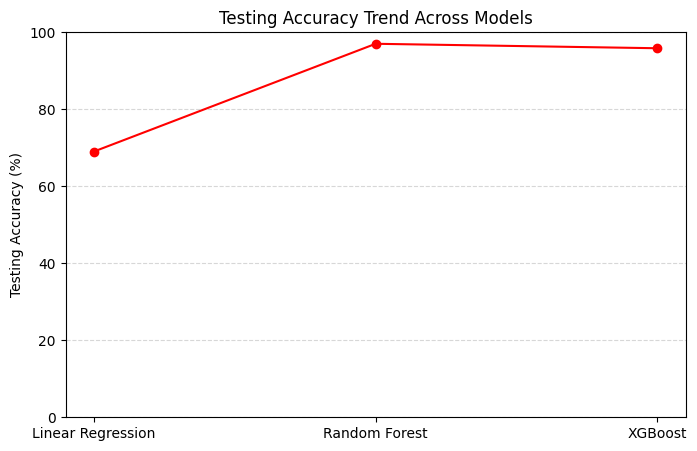

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(df_results["Model"], df_results["Testing Accuracy (%)"], marker='o', linestyle='-', color='red')
plt.title("Testing Accuracy Trend Across Models")
plt.ylabel("Testing Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle="--", alpha=0.5)  # alpha → Transparency of the line
plt.show()


# Hyperparameter Tuning (Improving Model Performance)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200 , 300],
    'max_depth': [5, 10, 15],
}

# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 15, 'n_estimators': 300}
Best Score: 0.9592675136777841


# Feature Importance Analysis (Understand What Matters)

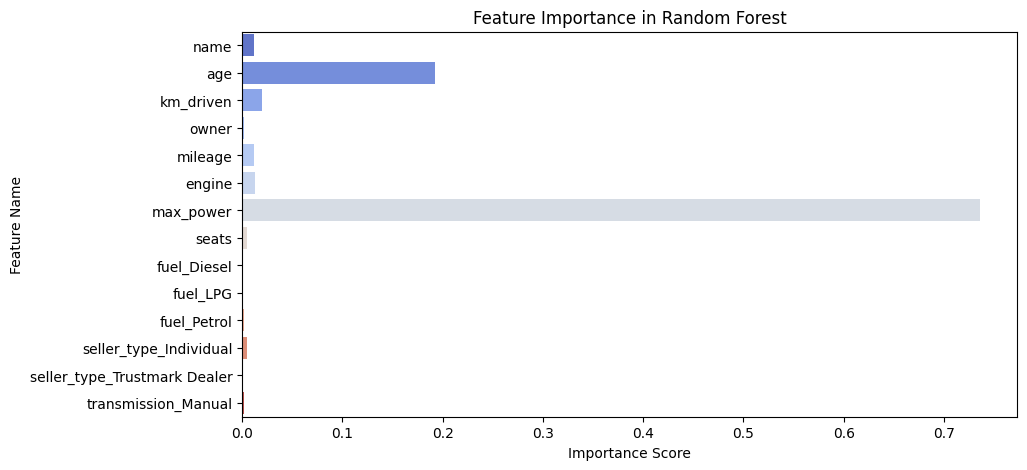

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.show()
